# Experiment of perceptron learning
### 名前: 山本雄介
### 学生番号: 1930032

First create a code that can find the linearly separable answer as in the handouts.

In [151]:
import numpy as np

y = np.array([1,1,1,2,2,2])
x = np.array([1.2, 0.2, -0.2, -0.5, -1.0, -1.5])
X = np.array([np.ones(len(x)), x])

In [152]:
def update_weight(w, X, y, rho = 0.5):
    gx = w.dot(X)
    if (gx > 0):
        y_pred = 1
    else:
        y_pred = 2

    if (gx > 0) & (y == 2):
        # when negative and misclassified, update the weights by w - rho*x
        new_w = w - rho * X
    elif (gx <= 0) & (y == 1):
        # when positive and misclassified, update the weights by w + rho*x
        new_w = w + rho * X
    else:
        new_w = w
    return(new_w, w, y_pred, gx)
    


In [153]:
# iterate upto 100 to avoid infinite loop
w = np.array([0.5, 0.5])
rho = 0.5
y_new = np.zeros(len(y))

for N in range(10):
    print("{}th iteration".format(N+1))
    for i in range(len(y)):
        w, old_w, y_pred, gx = update_weight(w, X[:,i], y[i], rho=0.5)
        y_new[i] = y_pred
        print(old_w, y_pred, gx)
    
    if all(y == y_new):
        print("iteration finished at {}".format(N+1))
        break
    else:
        continue
    

1th iteration
[0.5 0.5] 1 1.1
[0.5 0.5] 1 0.6
[0.5 0.5] 1 0.4
[0.5 0.5] 1 0.25
[0.   0.75] 2 -0.75
[0.   0.75] 2 -1.125
2th iteration
[0.   0.75] 1 0.8999999999999999
[0.   0.75] 1 0.15000000000000002
[0.   0.75] 2 -0.15000000000000002
[0.5  0.65] 1 0.175
[0.  0.9] 2 -0.9
[0.  0.9] 2 -1.35
3th iteration
[0.  0.9] 1 1.08
[0.  0.9] 1 0.18000000000000002
[0.  0.9] 2 -0.18000000000000002
[0.5 0.8] 1 0.09999999999999998
[0.   1.05] 2 -1.05
[0.   1.05] 2 -1.5750000000000002
4th iteration
[0.   1.05] 1 1.26
[0.   1.05] 1 0.21000000000000002
[0.   1.05] 2 -0.21000000000000002
[0.5  0.95] 1 0.024999999999999967
[0.  1.2] 2 -1.2000000000000002
[0.  1.2] 2 -1.8000000000000003
5th iteration
[0.  1.2] 1 1.4400000000000002
[0.  1.2] 1 0.24000000000000005
[0.  1.2] 2 -0.24000000000000005
[0.5 1.1] 2 -0.050000000000000044
[0.5 1.1] 2 -0.6000000000000001
[0.5 1.1] 2 -1.1500000000000001
6th iteration
[0.5 1.1] 1 1.82
[0.5 1.1] 1 0.72
[0.5 1.1] 1 0.27999999999999997
[0.5 1.1] 2 -0.050000000000000044
[0.5

This creates the exact same answer as in the handouts. The code looks good. 

Now let us experiment how the training behaves when we change how to update the parameter $\rho$. We will slightly change the code so that we can experiment how many iterations we need to find the answer.

In [154]:
def perceptron_training(w, X, y, rho = 0.5):
    y_new = np.zeros(len(y))
    # we will run upto 1000 iterations to avoid infinite loop.
    for N in range(1000):
        for i in range(len(y)):
            w, old_w, y_pred, gx = update_weight(w, X[:,i], y[i], rho=rho)
            y_new[i] = y_pred

        if all(y == y_new):
            return N+1
            break
        else:
            continue

In [155]:
w = np.array([0.5, 0.5])
rho = 0.5

perceptron_training(w, X, y, rho)

6

With this function we can count how many iterations were needed to find the linearly seprable answer.

In [205]:
rhos = [0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 5, 10]
iter_cnt = np.zeros(len(rhos))

for i, r in enumerate(rhos):
    iter_cnt[i] = perceptron_training(w, X, y, r)
    # print("rho = {}  found answer in {} iterations".format(r, iter_cnt[i]))
    

Text(0, 0.5, '# of iterations')

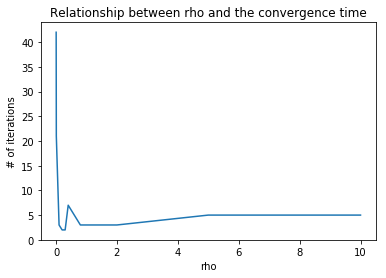

In [193]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(rhos, iter_cnt)
ax.set_title('Relationship between rho and the convergence time')
ax.set_xlabel('rho')
ax.set_ylabel('# of iterations')


As we can see in the graph, it takes only 2 iterations when $\rho$ is around 0.2 and 0.3. When $\rho$ is too small like less than 0.1, the convergence becomes slower and it takes more than 40 iterations to converge. It's interesting to note that the convergens becomes slower when $\rho$ is above 0.4, and starts to get faster as $\rho$ increases till 1. When $\rho$ is greater than 1 the speed of convergence becomes almost flat, and once it reaches 5, the number of necesarry iteration stays constant at 5. 

### Experiment of gradually changing $\rho$
In the previous example we had only six data points. To better experiment the effect of how $\rho$ is updated on the number of iterations, we increase the number of data points to 100. The numbers are generated randomly, and we assign label 2 if the value is greater than 0.9, and 1 otherwise. The following code generates such values and labels.

In [163]:
np.random.seed(893)
x1 = np.random.randn(100)
y1 = np.array([1 if val > 0.9 else 2 for val in x1])

X1 = np.array([np.ones(len(x1)), x1])

#### Case 1: $\rho$ is fixed
First we observe how the convergence speed changes as we change the value of $\rho$ and we keep it fixed throughout the iterations.

Text(0, 0.5, '# of iterations')

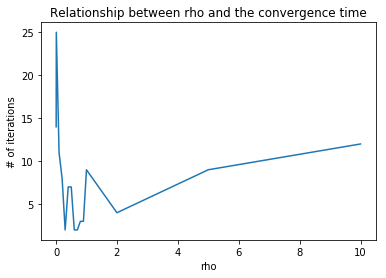

In [194]:
# rhos = [0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
iter_cnt = np.zeros(len(rhos))

w = np.array([0.5, 0.5])
for i, r in enumerate(rhos):
    iter_cnt[i] = perceptron_training(w, X1, y1, r)
    # print("rho = {}  found answer in {} iterations".format(r, iter_cnt[i]))
    
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(rhos, iter_cnt)
ax.set_title('Relationship between rho and the convergence time')
ax.set_xlabel('rho')
ax.set_ylabel('# of iterations')

As the graph above shows, we can observe a few things.
1. When $\rho$ is small it takes more iterations until the algorithm finds the correct classification.
2. When $\rho$ gets larger, it takes less iterations and appears to have the best value of $\rho$ that requires the lowest number of iterations. 
3. we do not observe a clear pattern between $\rho$ and the number of iterations when $\rho$ is greater than 2. It shows a wiggly pattern.

#### Case 2: $\rho$ shrinks at each iteration by fraction.
We will test how the number of iteration changes when we divide $\rho$ by two so it reduces to its half every iteration.

Text(0, 0.5, '# of iterations')

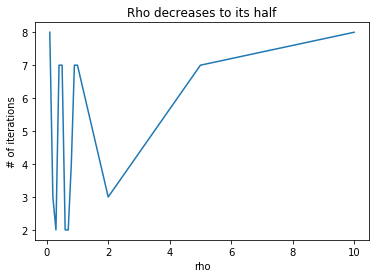

In [199]:
def perceptron_training_shrink_half(w, X, y, rho = 0.5):
    y_new = np.zeros(len(y))
    rho_ = rho
    # we will run upto 1000 iterations to avoid infinite loop.
    for N in range(1000):
        for i in range(len(y)):
            w, old_w, y_pred, gx = update_weight(w, X[:,i], y[i], rho=rho_)
            y_new[i] = y_pred

        # update rho
        rho_ = rho_ * 0.5
        if all(y == y_new):
            return N+1
            break
        else:
            continue

# rhos = [0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
iter_cnt_shrink_half = np.zeros(len(rhos))

w = np.array([0.5, 0.5])
for i, r in enumerate(rhos):
    iter_cnt_shrink_half[i] = perceptron_training_shrink_half(w, X1, y1, r)
    # print("rho = {}  found answer in {} iterations".format(r, iter_cnt[i]))

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(rhos, iter_cnt_shrink_half)
ax.set_title('Rho decreases to its half')
ax.set_xlabel('rho')
ax.set_ylabel('# of iterations')  


In [198]:
iter_cnt_shrink_half

array([nan, nan,  8.,  3.,  2.,  7.,  7.,  2.,  2.,  4.,  7.,  7.,  3.,
        7.,  8.])

This method shows a certain improvement in terms of the number of necessary iterations. At the worst case, it needs only 8 iterations even when $\rho$ is less than 0.1. In case 1 where $\rho$ is fixed, it needed more than 10 iterations. On the other hand, it shows some disadvantages. The number of required iterations changes vastly when $\rho$ is between 0.1 and 1.1. When $\rho = 0.1$ it needs 8 iterations while when it is 0.2 it needs only 3. When it increases to 0.4 the number of iterations goes up to 7, so small changes in $\rho$ makes a big differene in the number of iterations. Another disadvantage is it does not converge within 1000 iterations when $\rho$ is less than 0.01.

#### Case 3: $\rho$ shrinks at the power of 2
We take square of $\rho$ at every iteration when $\rho$ is less than 1 and take square root when $rho$ is greater than 1, so it decreases at slower pace than in case 2.

Text(0, 0.5, '# of iterations')

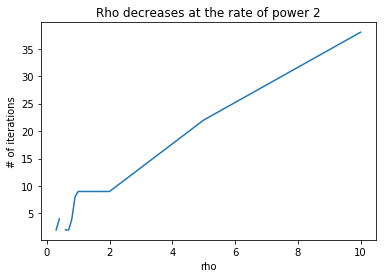

In [200]:
def perceptron_training_shrink_power(w, X, y, rho = 0.5):
    y_new = np.zeros(len(y))
    rho_ = rho
    # we will run upto 1000 iterations to avoid infinite loop.
    for N in range(1000):
        for i in range(len(y)):
            w, old_w, y_pred, gx = update_weight(w, X[:,i], y[i], rho=rho_)
            y_new[i] = y_pred

        # update rho
        if rho_ > 1:
            rho_ = rho_**0.5
        else:
            rho_ = rho_**2

        if all(y == y_new):
            return N+1
            break
        else:
            continue

# rhos = [0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
iter_cnt_shrink_power = np.zeros(len(rhos))

w = np.array([0.5, 0.5])
for i, r in enumerate(rhos):
    iter_cnt_shrink_power[i] = perceptron_training_shrink_power(w, X1, y1, r)
    # print("rho = {}  found answer in {} iterations".format(r, iter_cnt[i]))

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(rhos, iter_cnt_shrink_power)
ax.set_title('Rho decreases at the rate of power 2')
ax.set_xlabel('rho')
ax.set_ylabel('# of iterations')

In [202]:
iter_cnt_shrink_power

array([nan, nan, nan, nan,  2.,  4., nan,  2.,  2.,  4.,  8.,  9.,  9.,
       22., 38.])

It shows a clearly distinct pattern from case 2, and it shows a monotonically increasing pattern. The higher inital $\rho$ is, the longer it takes to converge. In one respect, this characteristic is useful because we only need to make $\rho$ smaller to achieve the lowest number of iterations, and we have somewhat predictable behaviour how the number of iterations changes as we change the value of $\rho$.


#### Case 4: $\rho$ changes depending on the accuracy
In the previous two cases, $\rho$ decreases at the same rate irrespective of how many data points were correctly classified. It may make sense that we keep $\rho$ high when the accuracy is low but we want to keep $\rho$ small when the accuracy is high and need only a slight modification on the classification.

We update $\rho$ by muliplying it with $1 - accuracy$, thus $\rho$ becomes small when the classification accuracy is high and it marginally decreases when the accuracy is low. For example, suppose the initial $\rho$ is set as 1.0. When the accuracy is 20% it decreases to 0.8, but when the accuracy is 80% it decreases to 0.2.

Text(0, 0.5, '# of iterations')

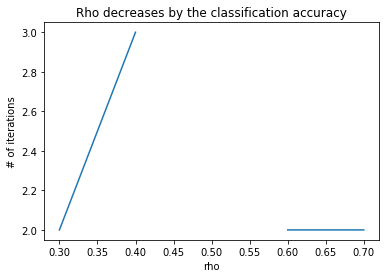

In [201]:
def perceptron_training_shrink_by_accuracy(w, X, y, rho = 0.5):
    y_new = np.zeros(len(y))
    rho_ = rho
    # we will run upto 1000 iterations to avoid infinite loop.
    for N in range(1000):
        for i in range(len(y)):
            w, old_w, y_pred, gx = update_weight(w, X[:,i], y[i], rho=rho_)
            y_new[i] = y_pred
        
        # calculate the classification accuracy.
        # We keep rho high when the accuracy is low, small otherwise.
        acc = sum(y == y_new) / len(y) * 1.0

        # update rho
        rho_ = rho_ * (1-acc)

        if all(y == y_new):
            return N+1
            break
        else:
            continue

# rhos = [0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4, 5, 6, 7, 8, 9, 10]
iter_cnt_shrink_acc = np.zeros(len(rhos))

w = np.array([0.5, 0.5])
for i, r in enumerate(rhos):
    iter_cnt_shrink_acc[i] = perceptron_training_shrink_by_accuracy(w, X1, y1, r)
    # print("rho = {}  found answer in {} iterations".format(r, iter_cnt[i]))

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(rhos, iter_cnt_shrink_acc)
ax.set_title('Rho decreases by the classification accuracy')
ax.set_xlabel('rho')
ax.set_ylabel('# of iterations')

In [206]:
rhos

[0.005, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 5, 10]

In [204]:
iter_cnt_shrink_acc

array([nan, nan, nan, nan,  2.,  3., nan,  2.,  2., nan, nan, nan, nan,
       nan, nan])

In this case it looks very difficult to tune the initial value of $\rho$. It converges within 1000 steps only when $\rho$ is 0.3, 0.4, 0.6 and 0.7. When it does converge it needs at most three iterations. 